# Configuración del ambiente

---



In [ ]:
pip install yfinance

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3aa2fdade4c5179daebceea977578b56c924987a2be333a4a0d2e6aa5204fcdb
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


# Obtención de datos

In [ ]:
import yfinance as yf
import pandas as pd
import ta
import time

def datos_historicos(ticker):
    # Descargar datos históricos
    datos = yf.download(ticker, start="2010-01-01", end="2024-08-27")

    # Calcular indicadores técnicos
    '''
    datos['SMA50'] = ta.trend.sma_indicator(datos['Close'], window=50)
    datos['SMA200'] = ta.trend.sma_indicator(datos['Close'], window=200)
    datos['MACD'] = ta.trend.macd(datos['Close'])
    datos['MACD_Signal'] = ta.trend.macd_signal(datos['Close'])
    datos['MACD_Hist'] = ta.trend.macd_diff(datos['Close'])
    datos['RSI'] = ta.momentum.rsi(datos['Close'], window=14)'''

    # Columnas

    datos = datos[['Open', 'High',	'Low',	'Close','Volume','Adj Close']]#'SMA50', 'SMA200', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI'
    while True:
      new_data = yf.download(ticker, period='1d', interval='5m')
      data = pd.concat([datos, new_data]).drop_duplicates()
      time.sleep(60)
      return data

    # Fetch the latest data (intraday or daily)


    # Update the DataFrame with new data


    # Display the updated DataFrame
    #$print(data.tail())

    # Pause for a minute before fetching new data




    # Ticker
ticker = 'SPY'
datos_SP500 = datos_historicos(ticker)
datos_SP500.index.name = 'Date'
datos_SP500.to_csv(f'{ticker}_datos_historicos.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
datos_SP500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04 00:00:00,112.370003,113.389999,111.510002,113.330002,118944600,86.580727
2010-01-05 00:00:00,113.260002,113.680000,112.849998,113.629997,111579900,86.809921
2010-01-06 00:00:00,113.519997,113.989998,113.430000,113.709999,116074400,86.871078
2010-01-07 00:00:00,113.500000,114.330002,113.180000,114.190002,131091100,87.237762
2010-01-08 00:00:00,113.889999,114.620003,113.660004,114.570000,126402800,87.528053


In [ ]:
datos_SP500.sample(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-10-20 00:00:00,116.940002,118.440002,116.870003,117.870003,200051800,91.336563
2014-09-08 00:00:00,200.919998,201.210007,200.000000,200.589996,64146000,167.896576
2020-06-29 00:00:00,301.410004,304.609985,298.929993,304.459991,79773300,287.019135
2011-10-20 00:00:00,121.430000,122.099998,119.820000,121.660004,262075600,96.147644
2023-02-17 00:00:00,406.059998,407.510010,404.049988,407.260010,89257800,398.634277
2016-04-15 00:00:00,208.009995,208.169998,207.399994,207.779999,75761600,180.242386
2017-07-19 00:00:00,246.020004,247.000000,246.009995,246.990005,51034300,219.747406
2014-08-11 00:00:00,193.970001,194.660004,193.710007,193.800003,74544000,162.213181
2011-09-22 00:00:00,113.250000,114.209999,111.300003,112.860001,513911300,89.193024


In [ ]:
datos_SP500.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2024-08-30 15:35:00-04:00,561.309998,561.854980,561.284973,561.750000,906043,561.750000
2024-08-30 15:40:00-04:00,561.750000,562.059998,561.530090,561.630005,996484,561.630005
2024-08-30 15:45:00-04:00,561.619995,561.979980,561.549988,561.969971,667055,561.969971
2024-08-30 15:50:00-04:00,561.969971,563.679993,561.950012,563.400024,3762793,563.400024
2024-08-30 15:55:00-04:00,563.400024,564.200012,563.309998,563.570007,6489576,563.570007


# Función para detectar tendencia

In [ ]:
def extract_trends(df):


    # Get the most recent prices
    current_price = df['Close'].iloc[-1]  # Latest closing price
    previous_price = df['Close'].iloc[-2]  # Previous day's closing price

    # Determine the trend
    if current_price > previous_price:
        trend = 'Upward'
    elif current_price < previous_price:
        trend = 'Downward'
    else:
        trend = 'Stable'

    # Return the current price and trend
    return current_price, trend

# Example usage
price, trend = extract_trends(datos_SP500)
print(f"Current Price: {price}, Trend: {trend}")


Current Price: 563.5700073242188, Trend: Upward


# Limpieza de datos

In [ ]:
def clean_data(df):
    # Make a copy of the original DataFrame
    df_clean = df.copy()

    # Remove duplicated entries based on the index
    df_clean = df_clean[~df_clean.index.duplicated(keep='first')]

    # Handle missing values in the 'Close' column (if any)
    df_clean = df_clean[~df_clean['Close'].isnull()]

    # Filter out rows where 'Volume' is zero
    df_clean = df_clean[df_clean['Volume'] > 0]

    # Quantile-based filtering to remove outliers in 'Close' prices
    valor = df_clean['Close']
    Q1 = valor.quantile(0.25)
    Q3 = valor.quantile(0.75)
    seleccion = (valor >= Q1) & (valor <= Q3)
    df_clean = df_clean[seleccion]

    # Calculate the mean of the 'Close' prices
    media_sp500 = df_clean['Close'].mean().round(2)
    return media_sp500, df_clean
    print(f"Media del S&P 500 después de la limpieza: {media_sp500}")
    print(df_clean.head())




clean_data(datos_SP500)



(249.68,
                   Open        High         Low       Close     Volume  \
 Date                                                                    
 2013-08-01  169.990005  170.809998  169.899994  170.660004  110438400   
 2013-08-02  170.279999  170.970001  170.050003  170.949997   91116700   
 2013-08-05  170.570007  170.960007  170.350006  170.699997   54072700   
 2013-08-08  169.979996  170.179993  168.929993  169.800003  102181300   
 2013-09-16  171.160004  171.240005  170.039993  170.309998  106299200   
 ...                ...         ...         ...         ...        ...   
 2022-11-02  383.899994  388.630005  374.760010  374.869995  126990400   
 2022-11-03  371.470001  374.200012  368.790009  371.010010   87100100   
 2022-11-04  377.000000  378.869995  370.000000  376.350006  103505200   
 2022-11-09  379.929993  381.140015  373.609985  374.130005   78495500   
 2022-12-28  381.329987  383.390015  376.420013  376.660004   70911500   
 
              Adj Close  
 

# Visualizaciones

---

# Visualizar los Precios de Cierre

---

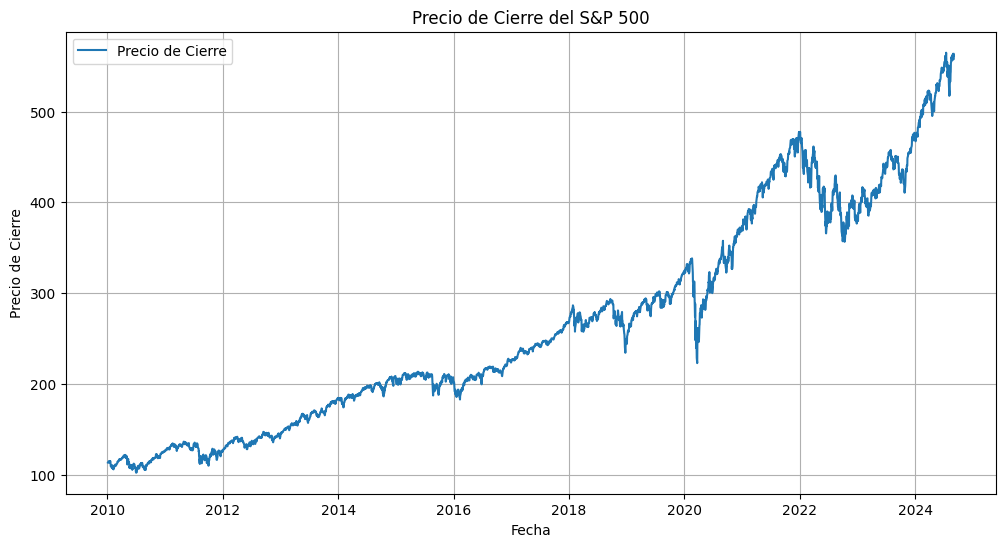

In [ ]:
import matplotlib.pyplot as plt

def plot_close_price(datos):
    plt.figure(figsize=(12, 6))
    plt.plot(datos.index, datos['Close'], label='Precio de Cierre')
    plt.title('Precio de Cierre del S&P 500')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_close_price(datos_SP500)

# Visualizar los Volúmenes de Transacción

---

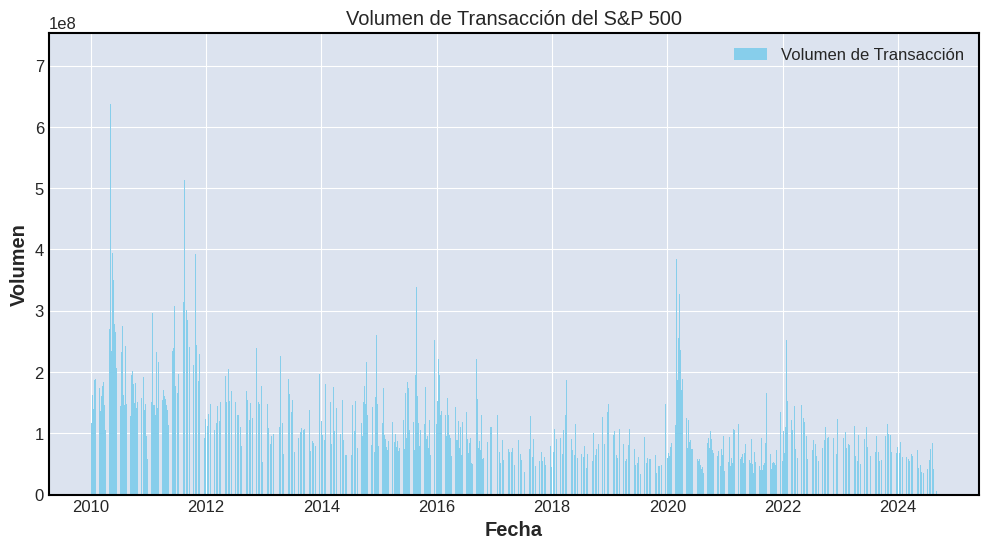

In [ ]:
def plot_volume(datos):
    plt.figure(figsize=(12, 6))
    plt.bar(datos.index, datos['Volume'], label='Volumen de Transacción', color='skyblue')
    plt.title('Volumen de Transacción del S&P 500')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_volume(datos_SP500)


# Análisis Técnico: Medias Móviles (SMA)

---

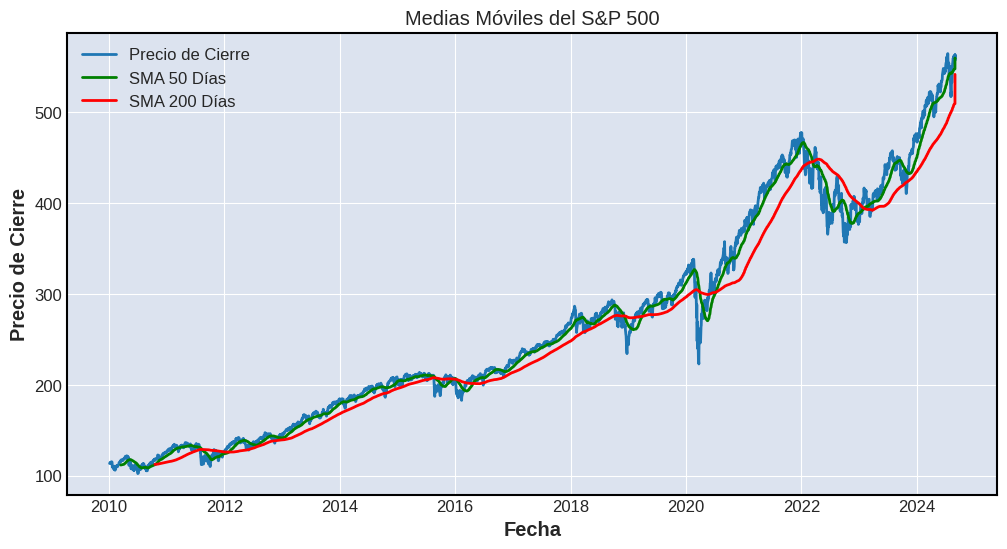

In [ ]:
def plot_moving_averages(datos):
    plt.figure(figsize=(12, 6))
    plt.plot(datos.index, datos['Close'], label='Precio de Cierre')
    plt.plot(datos.index, datos['SMA50'], label='SMA 50 Días', color='green')
    plt.plot(datos.index, datos['SMA200'], label='SMA 200 Días', color='red')
    plt.title('Medias Móviles del S&P 500')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de tener calculadas las medias móviles
datos_SP500['SMA50'] = ta.trend.sma_indicator(datos_SP500['Close'], window=50)
datos_SP500['SMA200'] = ta.trend.sma_indicator(datos_SP500['Close'], window=200)
plot_moving_averages(datos_SP500)

# Análisis del MACD
---

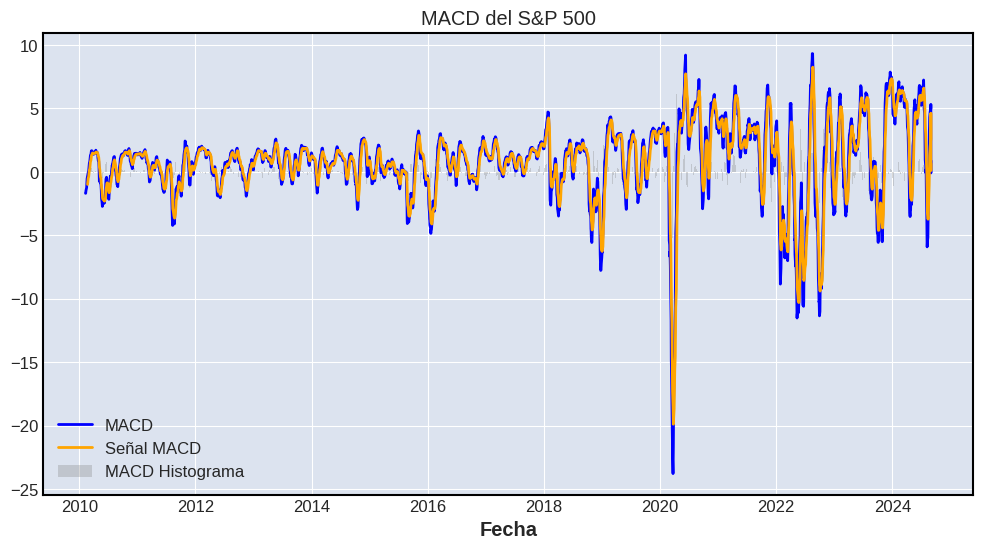

In [ ]:
def plot_macd(datos):
    plt.figure(figsize=(12, 6))
    plt.plot(datos.index, datos['MACD'], label='MACD', color='blue')
    plt.plot(datos.index, datos['MACD_Signal'], label='Señal MACD', color='orange')
    plt.bar(datos.index, datos['MACD_Hist'], label='MACD Histograma', color='gray', alpha=0.3)
    plt.title('MACD del S&P 500')
    plt.xlabel('Fecha')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de tener calculado el MACD
datos_SP500['MACD'] = ta.trend.macd(datos_SP500['Close'])
datos_SP500['MACD_Signal'] = ta.trend.macd_signal(datos_SP500['Close'])
datos_SP500['MACD_Hist'] = ta.trend.macd_diff(datos_SP500['Close'])
plot_macd(datos_SP500)

# Análisis del RSI
---

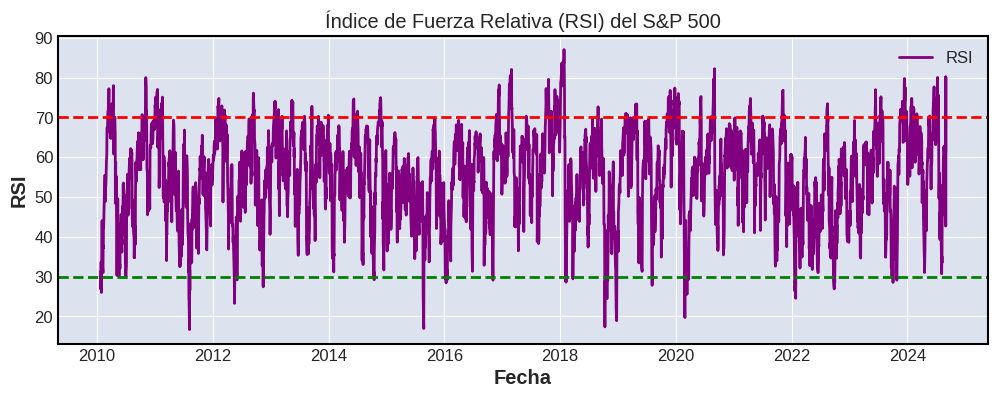

In [ ]:
def plot_rsi(datos):
    plt.figure(figsize=(12, 4))
    plt.plot(datos.index, datos['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title('Índice de Fuerza Relativa (RSI) del S&P 500')
    plt.xlabel('Fecha')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de tener calculado el RSI
datos_SP500['RSI'] = ta.momentum.rsi(datos_SP500['Close'], window=14)
plot_rsi(datos_SP500)

# Combinar las Visualizaciones
---

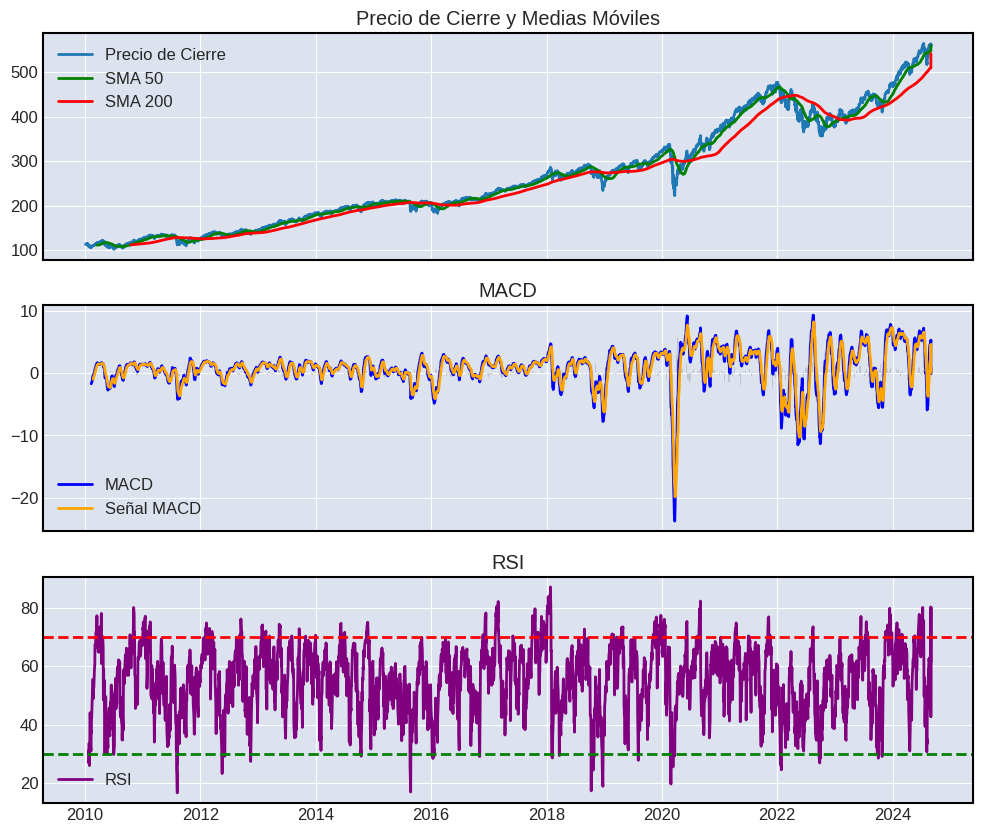

In [ ]:
def combined_plot(datos):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    # Precio de Cierre y Medias Móviles
    ax1.plot(datos.index, datos['Close'], label='Precio de Cierre')
    ax1.plot(datos.index, datos['SMA50'], label='SMA 50', color='green')
    ax1.plot(datos.index, datos['SMA200'], label='SMA 200', color='red')
    ax1.set_title('Precio de Cierre y Medias Móviles')
    ax1.legend()

    # MACD
    ax2.plot(datos.index, datos['MACD'], label='MACD', color='blue')
    ax2.plot(datos.index, datos['MACD_Signal'], label='Señal MACD', color='orange')
    ax2.bar(datos.index, datos['MACD_Hist'], color='gray', alpha=0.3)
    ax2.set_title('MACD')
    ax2.legend()

    # RSI
    ax3.plot(datos.index, datos['RSI'], label='RSI', color='purple')
    ax3.axhline(70, linestyle='--', color='red')
    ax3.axhline(30, linestyle='--', color='green')
    ax3.set_title('RSI')
    ax3.legend()

    plt.show()

combined_plot(datos_SP500)